# Car Price Prediction

### Problem Statement
Geely Auto, a Chinese automobile company, aims to establish a manufacturing unit in the United States and compete with American and European counterparts by producing cars locally. To understand the factors influencing car pricing in the American market, Geely Auto has engaged an automotive consulting company. The consulting company seeks to address the following questions:

- Which variables have a significant impact on predicting car prices?
- To what extent do these variables explain the variations in car prices?

The consulting firm has collected a comprehensive dataset of diverse car types from the American market, based on market surveys.






### Business Goal 

We are required to model the price of cars with the available independent variables. This model will be used by our management to understand how prices vary based on the independent variables. It will enable us to make informed decisions regarding car design, business strategy, and other factors to achieve desired price levels. Moreover, the model will provide valuable insights into the pricing dynamics of a new market.






In [255]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [256]:
# importing Data Sets
df_o =pd.read_csv("C:\Python projects serious ones\Car Price prediction\cardata.csv")

In [257]:
df_o.head().style.background_gradient(cmap='hot')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


Understanding the data

In [258]:
df_o.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [259]:
df_o.describe().style.background_gradient(cmap='Blues')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [260]:
#Splitting company name from CarName column and renaming it as Brand

Brand = df_o['CarName'].apply(lambda x : x.split(' ')[0])
df_o.insert(3,"Brand",Brand)
df_o.drop(['CarName'],axis=1,inplace=True)
df_o.head().style.background_gradient(cmap='cool')

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495.000000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500.000000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500.000000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950.000000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450.000000


In [261]:
df_o.Brand.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Brand, dtype: int64

We have identified instances where some brands are misspelled and appear as multiple entries in our data. We aim to address this issue by replacing and merging these brand variations together."

In [262]:
def change(a,b):
    df_o.Brand.replace(a,b,inplace=True)
change('maxda','mazda')
change('toyouta','toyota')
change('vokswagen','volkswagen')
change('vw','volkswagen')
change('porcshce','porsche')
change('nissan','Nissan')
df_o.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Visualisation 


In [263]:
df_o.columns

Index(['car_ID', 'symboling', 'Brand', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

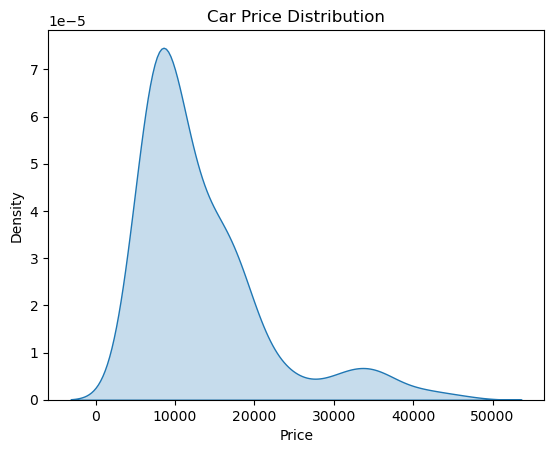

In [264]:
# car price Distribution 
fig = px.histogram(df_o, 
                   x=df_o.price, 
                   marginal='box', 
                   nbins=47, 
                   title='Car price Distribution'
                   )
fig.update_layout(bargap=0.1,showlegend=True)
fig.show()
sns.kdeplot(df_o['price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Car Price Distribution')
plt.show()

### Insights
1.Most of the cars are priced between 5k to 20k

2.Highest selling range is 7k-8k

In [265]:
# Fuel type Histogram 
fig = px.histogram(df_o, 
                   x=df_o.fueltype,
                   title='Fuel type Histogram',
                   color_discrete_sequence=['purple'])
fig.update_layout(bargap=0.1)
fig.show()


### Insights

1. IT can be clearly seen that Gas powered cars are more than 90 percent 

In [266]:
import plotly.graph_objects as go

engine_counts = df_o['enginetype'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=engine_counts.index,
    y=engine_counts.values,
    marker_color='green'
)])

fig.update_layout(
    title='Engine Type Distribution - Bar Chart',
    xaxis=dict(title='Engine Type'),
    yaxis=dict(title='Count'),
    bargap=0.1
)

fig.show()

### Insights
1. Ohc seems to be dominating the market

In [267]:
#Fuel System Histogram
fig = px.histogram(df_o, 
                   x=df_o.fuelsystem,
                   marginal='box',
                   nbins=47, 
                   title='Fuel system Histogram',
                   color_discrete_sequence=['blue'])
fig.update_layout(bargap=0.1)
fig.show()

#### Insights

1. Mpfi is the highest used Fuel System followed by 2bbl
2. Mfi and SPfi have the lowest count

In [268]:
#Brand Histogram
fig = px.histogram(df_o, 
                   x=df_o.Brand,
                   marginal='box',
                   nbins=47, 
                   title='Brand Sales Count  Histogram',
                   color_discrete_sequence=['orange'])
fig.update_layout(bargap=0.1)
fig.show()


### Insights
1.Toyota Has the Highest number of Sales count followed by Nissan and Mazda

2.Honda and Mitsubshi Volvo and Volkswagen are looking Good as well



In [269]:
import plotly.graph_objects as go

carbody_counts = df_o['carbody'].value_counts()

fig = go.Figure(data=[go.Pie(labels=carbody_counts.index,
                             values=carbody_counts.values,
                             textinfo='percent+label',
                             hole=0.7,
                             sort=False)])

fig.update_traces(marker=dict(colors=['green', 'red', 'blue', 'yellow', 'black', '#dda0dd']),
                  hoverinfo='label+percent+value',
                  textfont=dict(size=14))

fig.update_layout(title='Car Body Types',
                  showlegend=True,
                  height=500,
                  width=800)

fig.show()

### Insights

1.Sedans are the most selling followed by the Hatchback

2.Convertibles are the least selling 

In [270]:
fig = px.histogram(df_o, 
                   x=df_o.enginesize,
                   marginal='box',
                   nbins=47, 
                   title='Enginesize Histogram',
                   color_discrete_sequence=['grey'])
fig.update_layout(bargap=0.1)
fig.show()

Insights

1. Most used Car Engines Ranges between 90-99 bhp

2. Most of the car engines are ranged between 99-150 bhp

In [271]:
import plotly.express as px

fig = px.sunburst(df_o, path=['aspiration'], color='aspiration',
                  title='Aspiration Sunburst Chart',
                  color_discrete_sequence=px.colors.qualitative.Antique)

# Calculate percentage
aspiration_counts = df_o['aspiration'].value_counts()
total_count = aspiration_counts.sum()
percentages = [(count / total_count) * 100 for count in aspiration_counts]

# Add percentages to customdata
fig.data[0].customdata = percentages

# Update hovertemplate to include percentages
fig.update_traces(hovertemplate='<b>%{label}</b><br>Percentage: %{customdata:.2f}%')

fig.update_layout(bargap=0.1)

fig.show()

Insights

1. 82% of the cars use Standrad Engine

2. 18% cars have Turbo engine

# Bivariate analysis

In [272]:
##### Aspiration vs Price 
fig = px.box(df_o, x='aspiration', y='price')
fig.update_layout(title='aspiration Vs price', xaxis_title='aspiration', yaxis_title='price')
fig.show()

Insights

1. Turbo type car price ranges are generaly higher in the lower range But There are few outliers in Standard type where Prices go beyond 40k

2. Standard has a wider range 

In [273]:
fig = px.box(df_o, x='symboling', y='price')
fig.update_layout(title='Symboling Vs price', xaxis_title='symboling', yaxis_title='price')
fig.show()

# Insights

1. Cars labeled with a symboling of 0 and 1 have a significantly larger number of sales, indicating higher popularity among buyers.

2. Vehicles assigned a symboling of -1 tend to be priced at the upper end of the market, which aligns with their favorable insurance risk rating. Surprisingly, cars with a symboling of 3 exhibit a price range similar to those with a symboling of -2, with a notable decrease in price observed at a symboling of 1

In [274]:

import plotly.express as px

fig = px.box(df_o, x="enginetype", y="price", title="Engine Type vs Price", color_discrete_sequence=["orange"])
fig.show()

# Insights

1. Ohcv has a wider price range and as seen in earlier charts It is the highest selling

2. Dohcv is the least selling and has Higher price tag

3. Ohcf and Ohc are usually cheap but there are fewer occurances with a higher price tag

4. Rotor and Dohc  and l type are in lower price bracket 

5. 

In [275]:
# pip install pygal

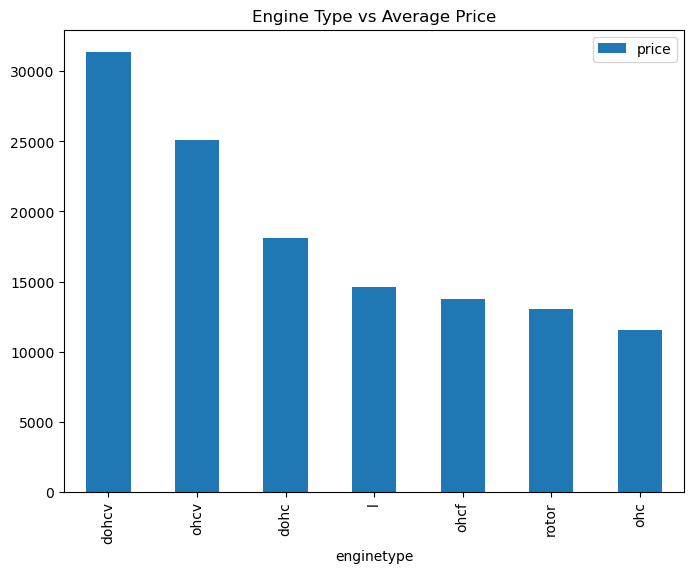

In [276]:
df = pd.DataFrame(df_o.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

Insights

1. Dohcv  Average price is higher followed by ohcv 

In [277]:
# Average Selling Price by Company 


df = pd.DataFrame(df_o.groupby(['Brand'])['price'].mean().sort_values(ascending=False))
df.reset_index(inplace=True)

fig = px.bar(df, x='price', y='Brand', orientation='h', color='price')

fig.update_layout(
    title='Average Selling Price by Company ',
    xaxis_title='Average Price',
    yaxis_title='Company Name',
    yaxis_categoryorder='total ascending',
    bargap=0.2
)

fig.show()

Insights

1. Jaguar has the Highest Average Selling  price i.e 34.6k followed by buick at 33.6k porche is at 3rd with 31.4k

2. chevrolet has the lowest Average selling price at 6k

2. There are plenty of option from 5k-10k 



In [278]:
# Average Selling Price of Difrent body types 

df = pd.DataFrame(df_o.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.reset_index(inplace=True)

fig = fig = px.bar(df, x='price', y='carbody', orientation='h', color='price')

fig.update_layout(
    title='Carbody vs Average Price',
    xaxis_title='Average Price',
    yaxis_title='Company Name',
    yaxis_categoryorder='total ascending',
    bargap=0.2
)

fig.show()

### Insights 

1. Hardtop and convertible type cars have higher price tags

2. Hatchbacks are priced under 10 k

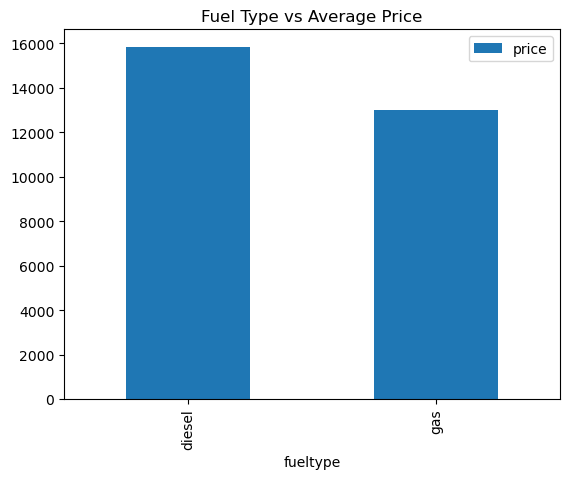

In [279]:
# Average Selling Price Acoording to Fuel Type

df = pd.DataFrame(df_o.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

InSights

1. Average Selling prices of Gas powered cars  is lower than the average of diesel powered cars



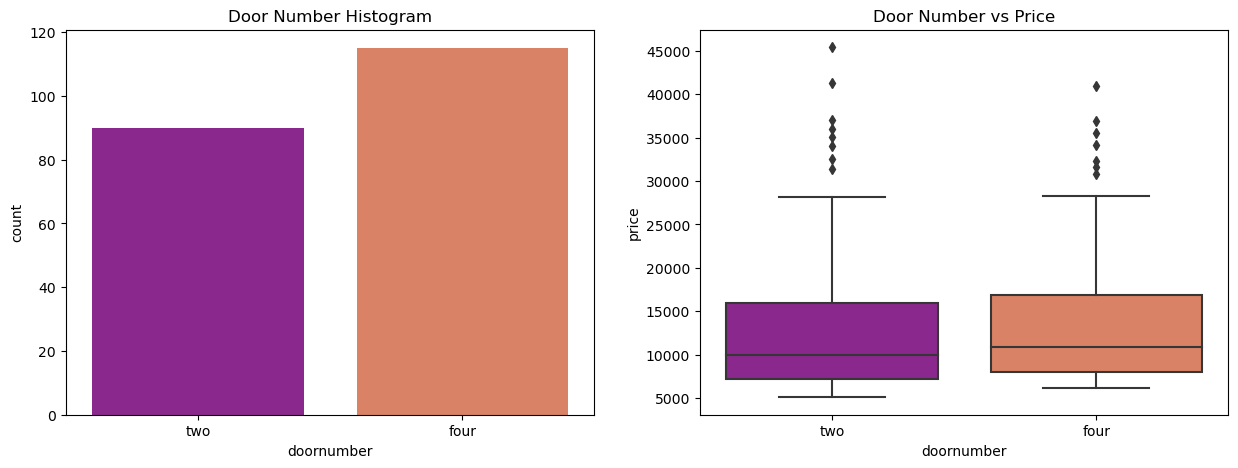

In [280]:
#Price by number of doors
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df_o.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df_o.doornumber, y=df_o.price, palette=("plasma"))

plt.show()



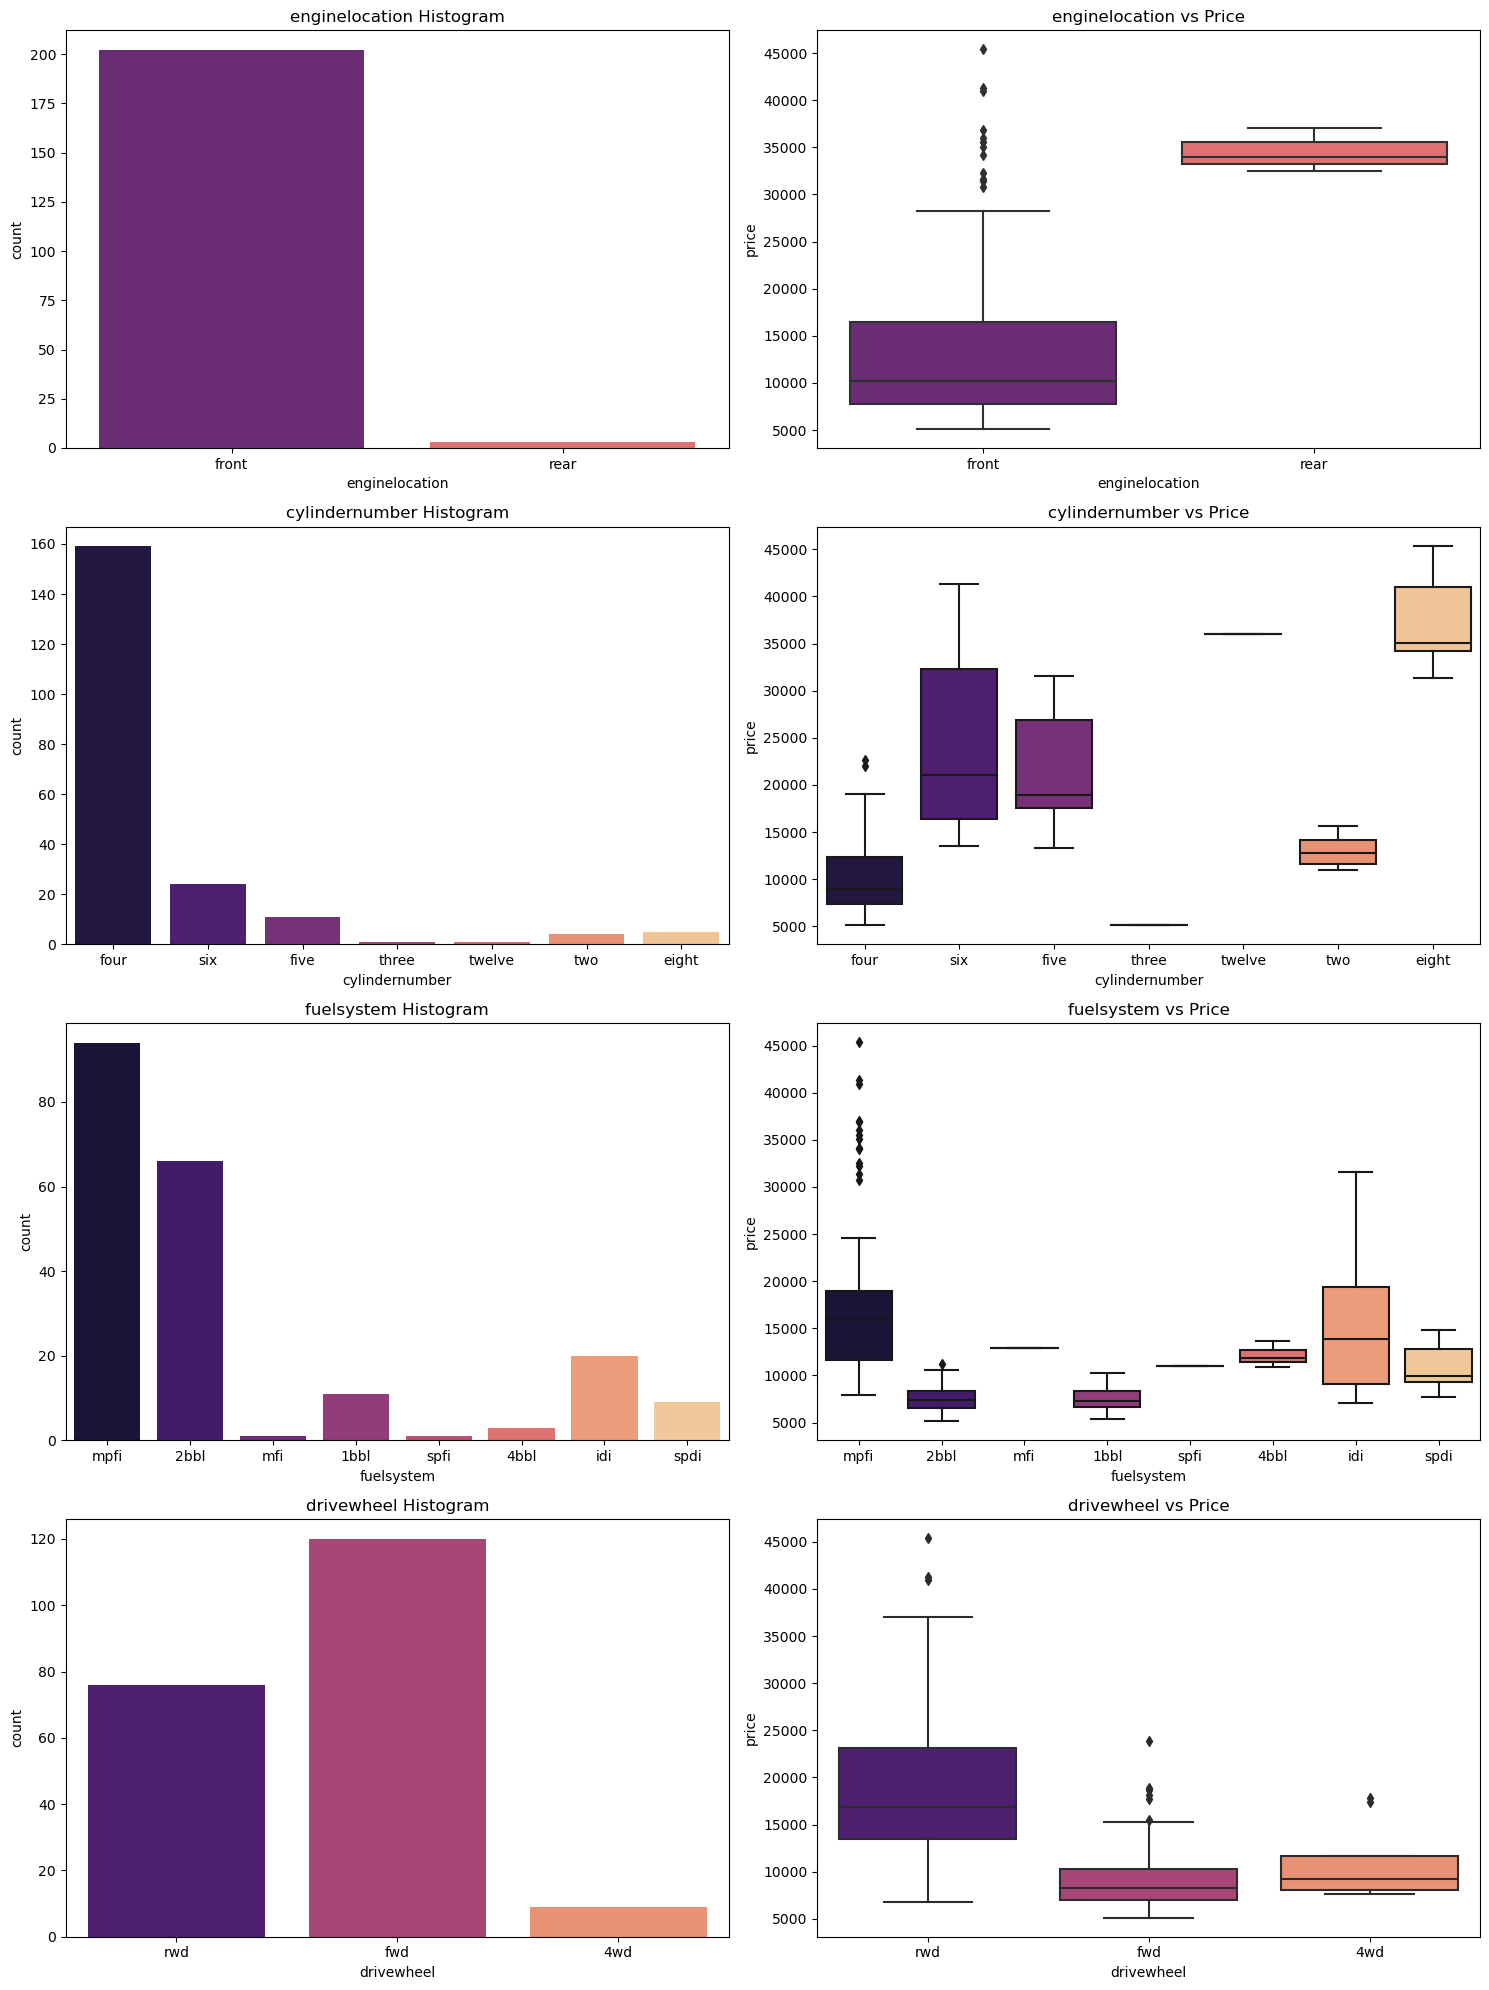

In [281]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df_o[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df_o[x], y=df_o.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

### Insights
1. RearEngine cars are expensive

2. Most of the cars Have Front Engine

3. Most of the Cars Have 4 Cylinders

4. Price Increases with the number of cylinders how ever there is a exception of 3 cylinder engine

5. Front wheel drive cars are Cheaper 4 wheel drive are higher and rear wheeled are the most expensive  

In [282]:
#car width Vs Price
fig = px.scatter(df_o, x='carwidth', y='price', color='fueltype',  title='carwidth vs Price')

fig.update_layout(
    xaxis_title='carwidth',
    yaxis_title='Price',
)

fig.show()

Insights 
1. Car Width Shows Positive co_relation

In [283]:
# car length vs price
fig = px.scatter(df_o, x='carlength', y='price', color='fueltype',  title='carlength vs Price')

fig.update_layout(
    xaxis_title='carlength',
    yaxis_title='Price',
)

fig.show()

# Insights

1. Car length and Price have a positive co Relation

In [284]:
fig = px.scatter(df_o, x='curbweight', y='price', color='fueltype',  title='curweight vs Price')

fig.update_layout(
    xaxis_title='curbweight',
    yaxis_title='Price',
)

fig.show()

# Insights

1. Curb Weight and Price have a positive co Relation

In [285]:
# Car height vs Price
fig = px.scatter(df_o, x='carheight', y='price', color='fueltype',  title='carheight vs Price')

fig.update_layout(
    xaxis_title='carheight',
    yaxis_title='Price',
)

fig.show()

Insights

1. Data Is scatter no relation Visible

## Multivariate Analysis

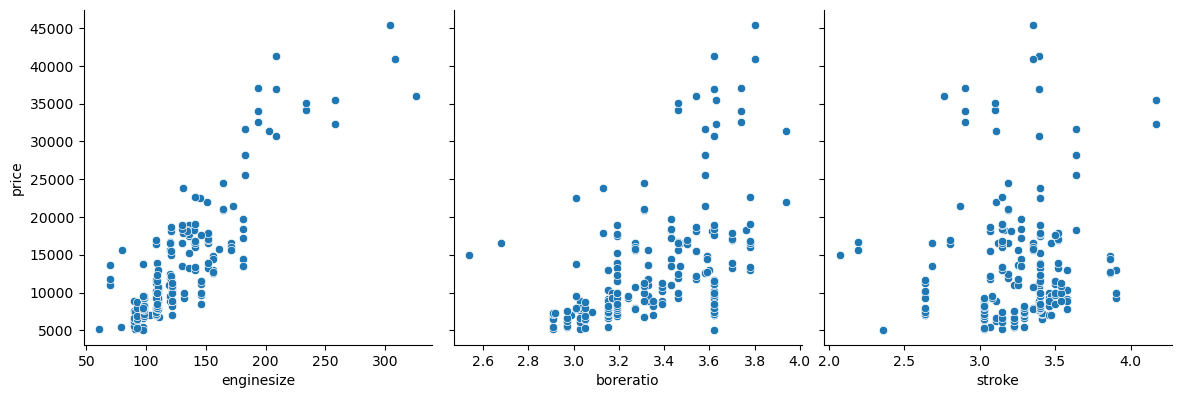

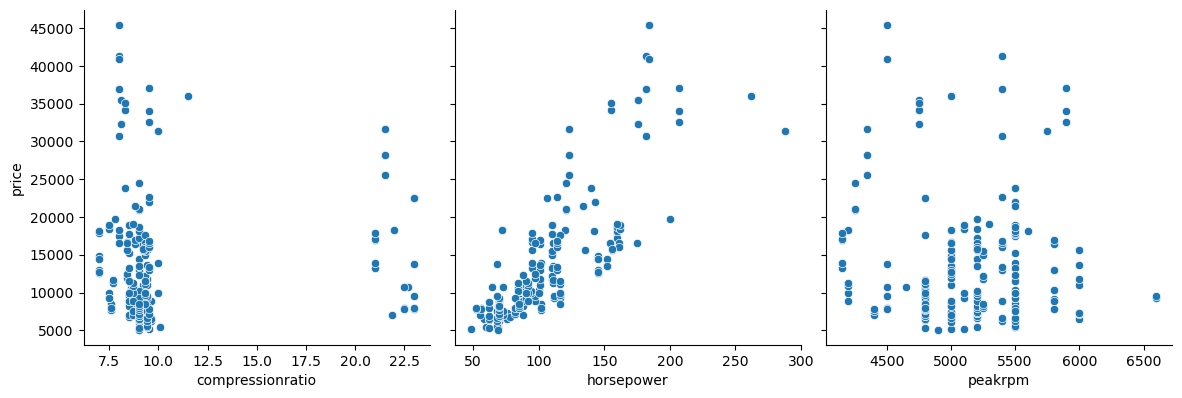

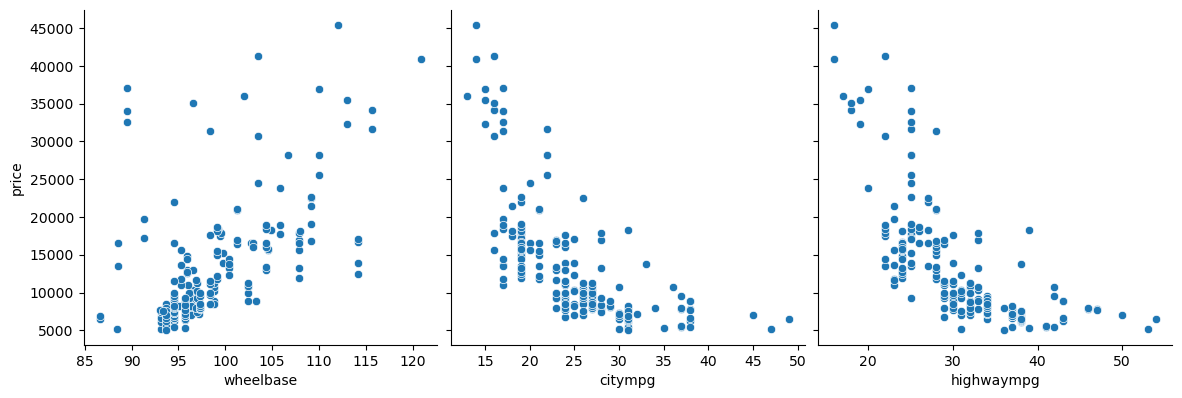

In [286]:
def pp(x,y,z):
    sns.pairplot(df_o, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

## Feature Engineering

In [287]:
#Fuel economy
df_o['fueleconomy'] = (0.55 * df_o['citympg']) + (0.45 * df_o['highwaympg'])
df_o['price'] = df_o['price'].astype('int')
temp = df_o.copy()
table = temp.groupby(['Brand'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left', on='Brand')
bins = [0, 10000, 20000, 40000]
cars_bin = ['Budget', 'Medium', 'Highend']
df_o['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)
df_o.head().style.background_gradient(cmap='cool')

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,13495,23.700000,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.470000,2.680000,9.000000,111,5000,21,27,16500,23.700000,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.000000,154,5000,19,26,16500,22.150000,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.190000,3.400000,10.000000,102,5500,24,30,13950,26.700000,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.190000,3.400000,8.000000,115,5500,18,22,17450,19.800000,Medium


In [288]:
# Fuel Economy vs Price
fig = px.scatter(df_o, x='fueleconomy', y='price', color='drivewheel',
                 title='Fuel economy vs Price')
fig.update_layout(
    xaxis_title='Mileage',
    yaxis_title='Price'
)
fig.show()

### Insights 
1. Price and fuel economy has a Negative co relation

<Figure size 600x2500 with 0 Axes>

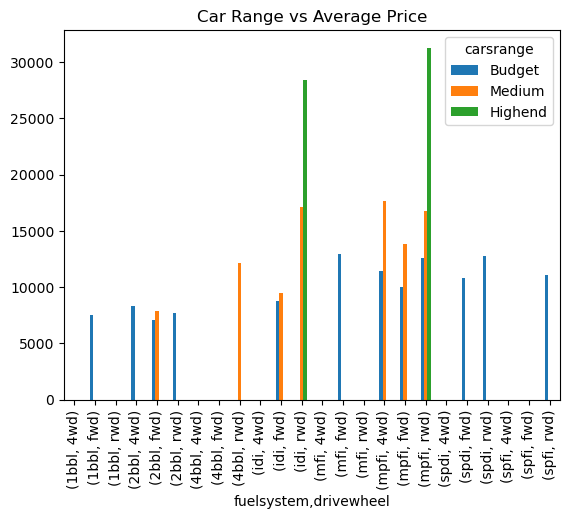

In [289]:
plt.figure(figsize=(6, 25))

df = pd.DataFrame(df_o.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy

Creating a new Data Frame with Important variable ony

In [290]:
df2 = df_o[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
df2.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


Getting Dummies for Categorical Variables

In [291]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df2 = dummies('fueltype',df2)
df2 = dummies('aspiration',df2)
df2 = dummies('carbody',df2)
df2 = dummies('drivewheel',df2)
df2 = dummies('enginetype',df2)
df2 = dummies('cylindernumber',df2)
df2 = dummies('carsrange',df2)

## Split The Train and Test Data For Model building

In [292]:
X = df2.drop('price', axis=1)
Y = df2['price']

In [302]:
# spliting Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=50)

In [311]:
X_train

array([[-0.83440176, -1.15042965, -0.81278032, ..., -0.16963779,
        -0.91287093, -0.36731544],
       [-0.49866892, -0.50938679, -0.81278032, ..., -0.16963779,
        -0.91287093, -0.36731544],
       [-0.24686929, -0.39491485, -0.42934911, ..., -0.16963779,
        -0.91287093, -0.36731544],
       ...,
       [ 2.60685987,  1.30308559, -0.1417757 , ..., -0.16963779,
         1.09544512, -0.36731544],
       [-0.83440176, -0.8146453 , -0.42934911, ..., -0.16963779,
        -0.91287093, -0.36731544],
       [ 0.6260361 , -0.25373279, -0.0938468 , ..., -0.16963779,
        -0.91287093, -0.36731544]])

In [304]:
Y_train

77      6189
153     6918
143     9960
57     13645
131     9895
       ...  
132    11850
33      6529
109    12440
139     7053
176    10898
Name: price, Length: 143, dtype: int32

In [305]:
# scaling
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression Model 

In [306]:
lr1=LinearRegression()
lr1.fit(X_train,Y_train)

LinearRegression()

#### Predictig y for test and train sets both

In [307]:
Y_pred_test=lr1.predict(X_test)
Y_pred_train=lr1.predict(X_train)

In [308]:
# comparing y-train actual values with predicted ones
r2_score(Y_train,Y_pred_train)

0.9571070501329677

In [309]:
# comparing y-test actual values with predicted ones

r2_score(Y_test,Y_pred_test)

0.91113881805685

In [313]:
mae=mean_absolute_error(Y_test,Y_pred_test)
mae

1700.0353311535914

In conclusion, the R-squared score of the Linear regression model indicates good explanatory power in predicting the prices of cars for the given problem statement. However, the higher Mean absolute Error (MAE) suggests that there is room for improvement in reducing prediction errors.

It's important to note that the acceptability of the model's performance will ultimately depend on the pricing strategy and tolerance for variation in prices set by Geely Auto